# KNN (K-Nearest-Neighbors) and SVM(Support Vector machines)

KNN and SVM are suitable for smaller datasets upto 1000 rows because the performance of these models will be slow for large amounts of data

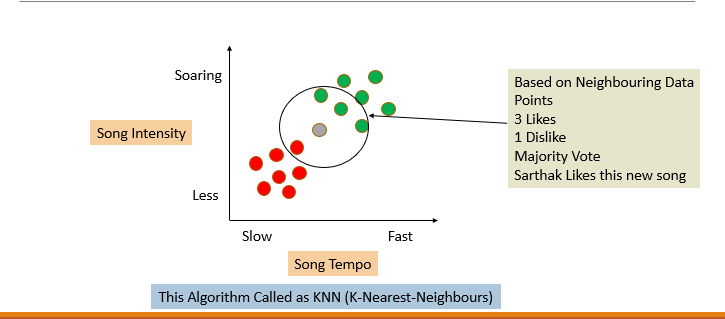

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Step 1 - Data Ingestion 
Read train data

In [2]:
import pandas as pd
df = pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


# Target Feature is to predict the Drug Type

# Step 2 - Perform basic data quality checks

In [3]:
df.shape

(200, 6)

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
df.nunique()

Age             57
Sex              2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


# Step 3 - Seperate X and Y(Drug)

In [8]:
X = df.drop(columns = ["Drug"])
Y = df["Drug"]

In [9]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [10]:
Y.head()

0    DrugY
1    drugC
2    drugC
3    drugX
4    DrugY
Name: Drug, dtype: object

In [11]:
Y.value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

<Axes: xlabel='Drug'>

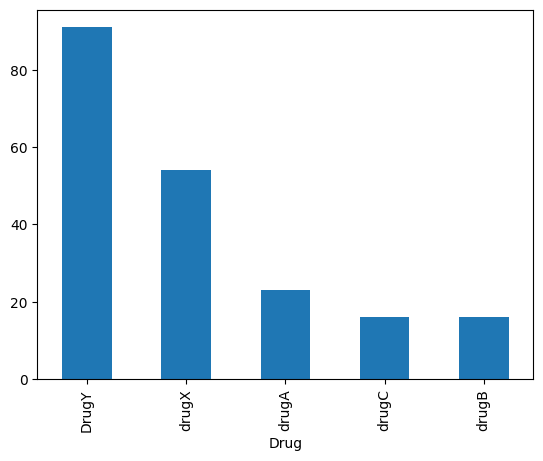

In [12]:
Y.value_counts().plot(kind="bar")

# Step 4 - Apply Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.4, random_state=42)

In [14]:
xtrain.head()

,Age,Sex,BP,Cholesterol,Na_to_K
2,47,M,LOW,HIGH,10.114
77,26,F,HIGH,NORMAL,19.161
46,37,F,HIGH,HIGH,13.091
187,47,M,HIGH,HIGH,10.403
191,23,M,HIGH,HIGH,8.011


In [15]:
ytrain.head()

2      drugC
77     DrugY
46     drugA
187    drugA
191    drugA
Name: Drug, dtype: object

In [16]:
xtest.head()

,Age,Sex,BP,Cholesterol,Na_to_K
95,36,M,LOW,NORMAL,11.424
15,16,F,HIGH,NORMAL,15.516
30,18,F,NORMAL,NORMAL,8.750
158,59,F,LOW,HIGH,10.444
128,47,M,LOW,NORMAL,33.542


In [17]:
ytest.head()

95     drugX
15     DrugY
30     drugX
158    drugC
128    DrugY
Name: Drug, dtype: object

In [18]:
xtrain.shape

(120, 5)

In [19]:
xtest.shape

(80, 5)

# Step 5 - Apply preprocessing on X

In [20]:
X.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
dtype: object

In [21]:
cat_cols = X.select_dtypes(include="object").columns.tolist()
cat_cols

['Sex', 'BP', 'Cholesterol']

In [22]:
num_cols = X.select_dtypes(include="number").columns.tolist()
num_cols

['Age', 'Na_to_K']

In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [24]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [25]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first")
)

In [26]:
pre = ColumnTransformer(
    [
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols)
    ]
).set_output(transform="pandas")

In [27]:
pre.fit(xtrain)

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [28]:
xtrain_pre = pre.transform(xtrain)
xtest_pre = pre.transform(xtest)

In [29]:
xtrain_pre.head()

,num__Age,num__Na_to_K,cat__Sex_M,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_NORMAL
2,0.117624,-0.884625,1.0,1.0,0.0,0.0
77,-1.165548,0.420766,0.0,0.0,0.0,1.0
46,-0.493410,-0.455074,0.0,0.0,0.0,0.0
187,0.117624,-0.842925,1.0,0.0,0.0,0.0
191,-1.348858,-1.188066,1.0,0.0,0.0,0.0


In [30]:
xtest_pre.head()

,num__Age,num__Na_to_K,cat__Sex_M,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_NORMAL
95,-0.554514,-0.695605,1.0,1.0,0.0,1.0
15,-1.776582,-0.105171,0.0,0.0,0.0,1.0
30,-1.654375,-1.081436,0.0,0.0,1.0,1.0
158,0.850865,-0.837009,0.0,1.0,0.0,0.0
128,0.117624,2.495800,1.0,1.0,0.0,1.0


# Step 6 - Model Building

### 1. KNN Model

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

model1 = KNeighborsClassifier(n_neighbors=50)
scores = cross_val_score(model1, xtrain_pre, ytrain, cv=5, scoring="f1_macro")
scores

array([0.23272727, 0.26      , 0.29333333, 0.24945055, 0.18333333])

In [32]:
scores.mean()

np.float64(0.2437688977688978)

In [33]:
scores.std()

np.float64(0.03612959465727313)

### Tune the KNN model

In [34]:
Y.unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [35]:
from sklearn.model_selection import GridSearchCV

params = {
    "n_neighbors": [6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
}

knn = KNeighborsClassifier()
gscv_knn = GridSearchCV(knn, params, cv=5, scoring="f1_macro")
gscv_knn.fit(xtrain_pre, ytrain)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [6, 7, ...]}"
,scoring,'f1_macro'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,8


In [36]:
gscv_knn.best_params_

{'n_neighbors': 8}

In [37]:
gscv_knn.best_score_

np.float64(0.8484805050022443)

In [38]:
best_knn = gscv_knn.best_estimator_
best_knn

,n_neighbors,8
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [39]:
from sklearn.metrics import f1_score
# Classification
results = []

def evaluate_and_log_model_class(results, model, xtrain, ytrain, xtest, ytest, description):
    # Cross validate results
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring="f1_macro")
    cv_mean = scores.mean().round(4)
    cv_std = scores.std().round(4)
    # Fit the model
    model.fit(xtrain, ytrain)
    # Predict results for train and test
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)
    # Calculate f1 macro on train and test
    f1_train = round(f1_score(ytrain, ypred_train, average="macro"), 4)
    f1_test = round(f1_score(ytest, ypred_test, average="macro"), 4)
    # Get the generalization error
    gen_error = round(abs(f1_train -  f1_test), 4)
    # Store above results in dictionary
    r = {
        "description": description,
        "model": type(model).__name__,
        "cv_mean": cv_mean,
        "cv_std": cv_std,
        "f1_train": f1_train,
        "f1_test": f1_test,
        "gen_error": gen_error
    }
    print(r)
    results.append(r)
    return model

In [40]:
sel_knn = evaluate_and_log_model_class(
    results, best_knn, xtrain_pre, ytrain, xtest_pre, ytest,
    description="Tuned KNN model"
)

{'description': 'Tuned KNN model', 'model': 'KNeighborsClassifier', 'cv_mean': np.float64(0.8485), 'cv_std': np.float64(0.0915), 'f1_train': 0.9006, 'f1_test': 0.9274, 'gen_error': 0.0268}


### 2. SVM (Support Vector Machines)

In [41]:
from sklearn.svm import SVC

model_svm = SVC(probability=True)
scores2 = cross_val_score(model_svm, xtrain_pre, ytrain, cv=5, scoring="f1_macro")
scores2

array([0.92533333, 0.94461538, 0.92515152, 0.87788443, 0.84463768])

In [42]:
scores2.mean()

np.float64(0.9035244697331655)

In [43]:
scores2.std()

np.float64(0.036761077761714854)

In [44]:
sel_svm = evaluate_and_log_model_class(
    results, model_svm, xtrain_pre, ytrain, xtest_pre, ytest,
    description="SVM model"
)

{'description': 'SVM model', 'model': 'SVC', 'cv_mean': np.float64(0.9035), 'cv_std': np.float64(0.0368), 'f1_train': 0.9948, 'f1_test': 0.9815, 'gen_error': 0.0133}


In [45]:
results

[{'description': 'Tuned KNN model',
  'model': 'KNeighborsClassifier',
  'cv_mean': np.float64(0.8485),
  'cv_std': np.float64(0.0915),
  'f1_train': 0.9006,
  'f1_test': 0.9274,
  'gen_error': 0.0268},
 {'description': 'SVM model',
  'model': 'SVC',
  'cv_mean': np.float64(0.9035),
  'cv_std': np.float64(0.0368),
  'f1_train': 0.9948,
  'f1_test': 0.9815,
  'gen_error': 0.0133}]

In [46]:
results_df = pd.DataFrame(results)
results_df

,description,model,cv_mean,cv_std,f1_train,f1_test,gen_error
0,Tuned KNN model,KNeighborsClassifier,0.8485,0.0915,0.9006,0.9274,0.0268
1,SVM model,SVC,0.9035,0.0368,0.9948,0.9815,0.0133


In [47]:
results_df.to_csv("evaluation.csv", index=False)

### From above results SVC has lowest generalization error and also good cross validation score
### Select SVC model for this data

# Step 7 - Evaluate selected model in detail

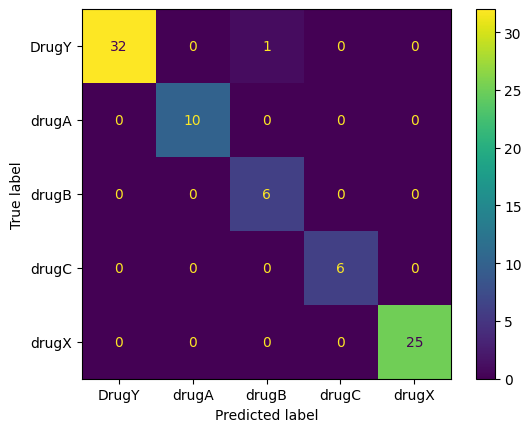

In [62]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(sel_svm, xtest_pre, ytest)

In [63]:
ypred_test = sel_svm.predict(xtest_pre)
ypred_test

array(['drugX', 'DrugY', 'drugX', 'drugC', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'drugA', 'drugX', 'drugA', 'drugX', 'DrugY', 'drugA',
       'drugB', 'DrugY', 'drugB', 'drugX', 'drugC', 'DrugY', 'drugB',
       'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugC', 'drugX',
       'DrugY', 'drugX', 'DrugY', 'drugC', 'drugC', 'DrugY', 'drugA',
       'DrugY', 'drugX', 'drugA', 'DrugY', 'drugA', 'drugX', 'drugX',
       'drugX', 'DrugY', 'DrugY', 'drugC', 'DrugY', 'DrugY', 'drugB',
       'drugX', 'drugX', 'DrugY', 'drugX', 'DrugY', 'drugX', 'DrugY',
       'drugA', 'DrugY', 'DrugY', 'DrugY', 'drugA', 'DrugY', 'drugB',
       'DrugY', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'drugB',
       'drugX', 'drugX', 'drugX', 'drugB', 'drugA', 'drugX', 'DrugY',
       'drugX', 'drugA', 'drugX'], dtype=object)

In [64]:
from sklearn.metrics import classification_report

print(classification_report(ypred_test, ytest))

              precision    recall  f1-score   support

       DrugY       0.97      1.00      0.98        32
       drugA       1.00      1.00      1.00        10
       drugB       1.00      0.86      0.92         7
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        25

    accuracy                           0.99        80
   macro avg       0.99      0.97      0.98        80
weighted avg       0.99      0.99      0.99        80



# From above metrics it is clear that this model is good and can be used for out of sample prediction

# Step 9 - Out of Sample Prediction

In [66]:
xnew = pd.read_csv("drugtest.csv")
xnew

,Age,Sex,BP,Cholesterol,Na_to_K
0,37.0,F,HIGH,HIGH,13.091
1,NaN,F,HIGH,HIGH,12.894
2,23.0,M,NaN,HIGH,31.686
3,31.0,M,HIGH,HIGH,30.366
4,39.0,M,HIGH,HIGH,9.664
5,16.0,M,LOW,HIGH,12.006
6,33.0,F,LOW,HIGH,NaN
7,59.0,M,HIGH,HIGH,NaN
8,68.0,M,LOW,HIGH,10.291
9,30.0,F,NORMAL,HIGH,10.443


In [67]:
xnew.isna().sum()

Age            3
Sex            0
BP             2
Cholesterol    3
Na_to_K        6
dtype: int64

In [68]:
pre

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [69]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,num__Age,num__Na_to_K,cat__Sex_M,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_NORMAL
0,-0.493410,-0.455074,0.0,0.0,0.0,0.0
1,0.087072,-0.483499,0.0,0.0,0.0,0.0
2,-1.348858,2.227998,1.0,0.0,0.0,0.0
3,-0.860031,2.037535,1.0,0.0,0.0,0.0
4,-0.371203,-0.949555,1.0,0.0,0.0,0.0


In [70]:
preds = sel_svm.predict(xnew_pre)
preds

array(['drugA', 'drugA', 'DrugY', 'DrugY', 'drugA', 'drugC', 'drugC',
       'drugB', 'drugC', 'drugX', 'drugC', 'drugA', 'drugX', 'DrugY',
       'drugA', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugX', 'DrugY',
       'drugX', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'DrugY', 'DrugY', 'DrugY', 'drugC', 'DrugY', 'drugC',
       'DrugY', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'drugX', 'DrugY',
       'DrugY', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'DrugY',
       'drugC'], dtype=object)

In [71]:
probs = sel_svm.predict_proba(xnew_pre)
probs[0:5]

array([[0.05926841, 0.86300513, 0.01797599, 0.04430487, 0.0154456 ],
       [0.06714167, 0.70483206, 0.14429758, 0.0544196 , 0.02930908],
       [0.95075544, 0.00580048, 0.00764583, 0.0153353 , 0.02046295],
       [0.97242171, 0.00363062, 0.00424508, 0.00946993, 0.01023267],
       [0.00472532, 0.93943336, 0.01550485, 0.03107451, 0.00926196]])

In [72]:
sel_svm.classes_

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

In [73]:
xnew["Drug"] = preds
xnew[sel_knn.classes_] = probs.round(4)

In [74]:
xnew

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,DrugY,drugA,drugB,drugC,drugX
0,37.0,F,HIGH,HIGH,13.091,drugA,0.0593,0.8630,0.0180,0.0443,0.0154
1,NaN,F,HIGH,HIGH,12.894,drugA,0.0671,0.7048,0.1443,0.0544,0.0293
2,23.0,M,NaN,HIGH,31.686,DrugY,0.9508,0.0058,0.0076,0.0153,0.0205
3,31.0,M,HIGH,HIGH,30.366,DrugY,0.9724,0.0036,0.0042,0.0095,0.0102
4,39.0,M,HIGH,HIGH,9.664,drugA,0.0047,0.9394,0.0155,0.0311,0.0093
5,16.0,M,LOW,HIGH,12.006,drugC,0.0396,0.0260,0.0100,0.8831,0.0414
6,33.0,F,LOW,HIGH,NaN,drugC,0.1866,0.0334,0.0075,0.7165,0.0560
7,59.0,M,HIGH,HIGH,NaN,drugB,0.0711,0.0744,0.7923,0.0410,0.0212
8,68.0,M,LOW,HIGH,10.291,drugC,0.0611,0.0132,0.0552,0.8352,0.0353
9,30.0,F,NORMAL,HIGH,10.443,drugX,0.0240,0.0329,0.0072,0.0225,0.9133


In [75]:
xnew["Drug"].value_counts()

Drug
DrugY    28
drugX     9
drugC     7
drugA     5
drugB     1
Name: count, dtype: int64

<Axes: xlabel='Drug'>

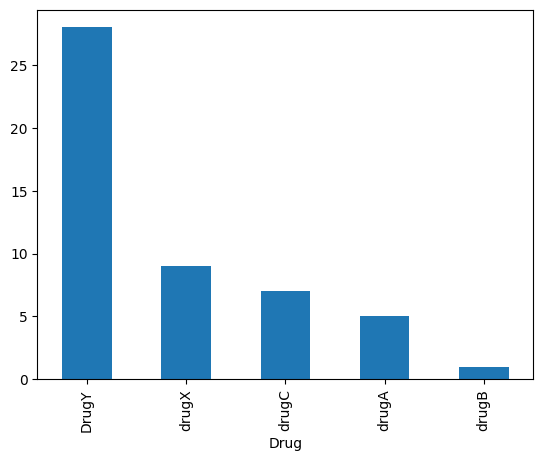

In [76]:
xnew["Drug"].value_counts().plot(kind="bar")

# Step 9 - Save the model object and preprocessor

In [77]:
pre

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [78]:
sel_svm

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [79]:
import joblib

joblib.dump(pre, "pre.joblib")

['pre.joblib']

In [80]:
joblib.dump(sel_svm, "drug_model.joblib")

['drug_model.joblib']

### Loading models from the file

In [81]:
p = joblib.load("pre.joblib")
p

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [82]:
m = joblib.load("drug_model.joblib")
m

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False
